<a href="https://colab.research.google.com/github/mcruzr0609/pastillitas/blob/main/dataset_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /gdrive
random background file is Brick.0005.ppm
239, 119
75, 60
186, 379
61, 56
287, 89


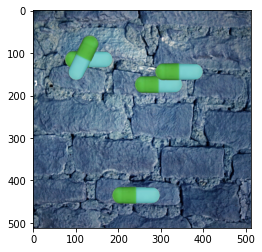

In [1]:
from google.colab import drive
drive.mount('/gdrive')

import cv2
import matplotlib.pyplot as plt
import os, random

def add_pill(background, pill, x_offset=1, y_offset=1):
    y1, y2 = y_offset, y_offset + pill.shape[0]
    x1, x2 = x_offset, x_offset + pill.shape[1]

    alpha_s = pill[:, :, 3] / 255.0
    alpha_l = 1.0 - alpha_s
    for c in range(0, 3):
        background[y1:y2, x1:x2, c] = (alpha_s * pill[:, :, c] +
                                alpha_l * background[y1:y2, x1:x2, c])
    return background

def rotation_pill(pill, rotation):
    ancho = pill.shape[1] 
    alto = pill.shape[0] 
    M = cv2.getRotationMatrix2D((ancho//2,alto//2),rotation,1)
    return cv2.warpAffine(pill,M,(ancho,alto))

def get_random_image(dataset = 'a', num_pills = 1, scale_percent = 70):
    background_basedir = '/gdrive/My Drive/pildoras/dataset/background/'
    pill_basedir = '/gdrive/My Drive/pildoras/dataset/pills/{}/'
    
    pill_basedir = pill_basedir.format(dataset)
    background = random.choice([x for x in os.listdir(background_basedir) if os.path.isfile(os.path.join(background_basedir, x))])
    pill = random.choice([x for x in os.listdir(pill_basedir) if os.path.isfile(os.path.join(pill_basedir, x))])
    print('random background file is {}'.format(background))

    l_img = cv2.imread(background_basedir + background, -1)
    s_img = cv2.imread(pill_basedir + pill, -1)
    
    width = int(s_img.shape[1] * scale_percent / 100)
    height = int(s_img.shape[0] * scale_percent / 100)
    dsize = (width, height)
    s_img = cv2.resize(s_img, dsize)
    image = None

    for x in range(num_pills):
        pille = s_img.copy()
        if random.random() > 0.5:
            pille = rotation_pill(pille,random.randint(1,365))

        x_offset=random.randint(0, l_img.shape[1] - pille.shape[0])
        y_offset=random.randint(0, l_img.shape[0] - pille.shape[0])
        print('{}, {}'.format(x_offset, y_offset))
        image = add_pill(l_img, pille, x_offset, y_offset)
    return image

plt.imshow(get_random_image(dataset = 'a', num_pills = 5, scale_percent = 50))   

#for x in range(200):
#    cv2.imwrite('/gdrive/My Drive/pildoras/dataset/newdataset/img_{}.jpg'.format(x),
#                get_random_image(dataset = 'a', num_pills = random.randint(1,5), scale_percent = random.randint(50,90))) 